### **Importing necessary Libraries**

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
tf.__version__

'2.14.0'

### **Checking for GPU**

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Wed Dec 13 12:42:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Loading the Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

### Spliting the Dataset in train and test

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape # 60,000 data points of 28*28 size images

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
img.shape

(28, 28)

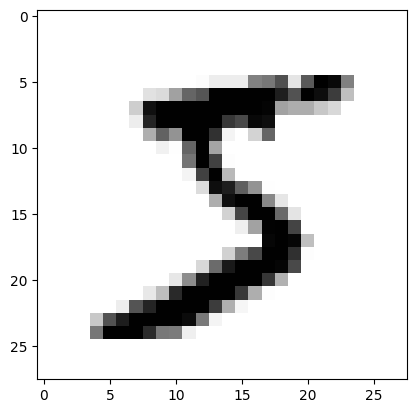

In [ ]:
plt.imshow(img, cmap="binary")

<Axes: >

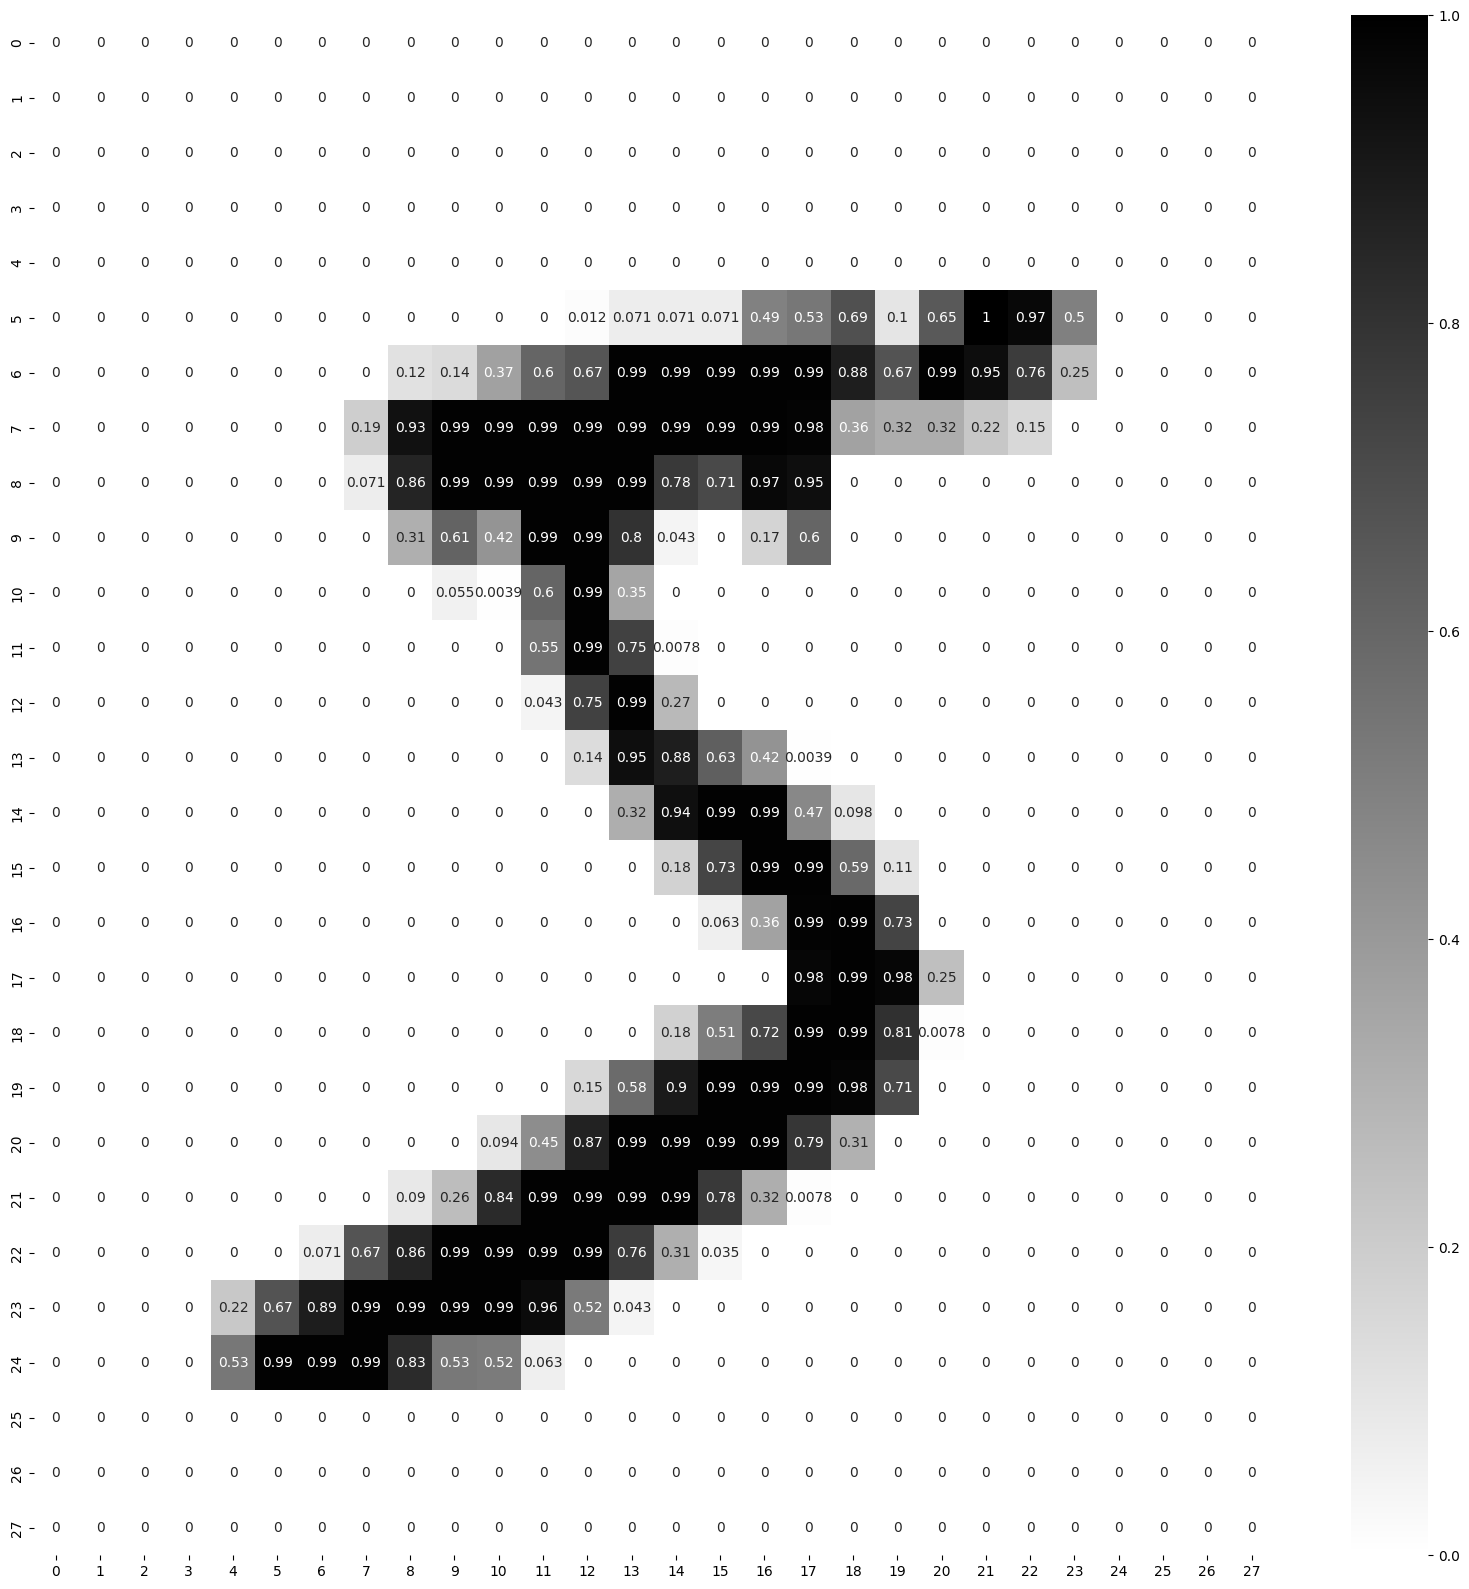

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

### Normalising the Dataset

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

# Model Creation
### Input Layer
- Type: Flatten
- Input Shape: (28, 28)
- Name: "inputLayer"

### Hidden Layer 1
- Type: Dense
- Neurons: 300
- Activation Function: ReLU
- Name: "hiddenLayer1"

### Hidden Layer 2
- Type: Dense
- Neurons: 100
- Activation Function: ReLU
- Name: "hiddenLayer2"

### Output Layer
- Type: Dense
- Neurons: CLASSES (10)
- Activation Function: Softmax
- Name: "outputLayer"


In [ ]:
CLASSES = 10

LAYERS = [
          tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"),
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_clf.layers[1].name

'hiddenLayer1'

# **We can determine the initialized weights and biases**

In [ ]:
weights, biases = model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
weights[0].dtype

dtype('float32')

In [ ]:
biases.shape

(300,)

In [ ]:
biases.dtype

dtype('float32')

In [ ]:
weights

array([[-0.05631609, -0.02954211, -0.00302081, ...,  0.04580393,
        -0.02569702, -0.03544575],
       [ 0.02571123,  0.03398108,  0.00787002, ...,  0.01676942,
         0.00428236,  0.04174487],
       [ 0.00696647, -0.00745063, -0.02709938, ..., -0.05062185,
        -0.04126802, -0.02090115],
       ...,
       [ 0.01826335, -0.06187645,  0.06163654, ...,  0.05640553,
        -0.02037088, -0.03707953],
       [ 0.00524318, -0.04235902,  0.06849726, ..., -0.06676571,
        -0.05531764,  0.03396521],
       [-0.03361781, -0.0022264 ,  0.04104725, ..., -0.05466847,
        -0.04327758,  0.00464359]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [ ]:
# Train the model.
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train,
              epochs=EPOCHS, batch_size=16,
              validation_data=VALIDATION)

Epoch 1/30
3438/3438 [==============================] - 24s 5ms/step - loss: 0.4539 - accuracy: 0.8775 - val_loss: 0.2391 - val_accuracy: 0.9318
Epoch 2/30
3438/3438 [==============================] - 14s 4ms/step - loss: 0.2251 - accuracy: 0.9357 - val_loss: 0.1768 - val_accuracy: 0.9530
Epoch 3/30
3438/3438 [==============================] - 14s 4ms/step - loss: 0.1714 - accuracy: 0.9511 - val_loss: 0.1448 - val_accuracy: 0.9612
Epoch 4/30
3438/3438 [==============================] - 13s 4ms/step - loss: 0.1394 - accuracy: 0.9603 - val_loss: 0.1286 - val_accuracy: 0.9660
Epoch 5/30
3438/3438 [==============================] - 16s 5ms/step - loss: 0.1159 - accuracy: 0.9663 - val_loss: 0.1105 - val_accuracy: 0.9724
Epoch 6/30
3438/3438 [==============================] - 13s 4ms/step - loss: 0.0989 - accuracy: 0.9722 - val_loss: 0.1032 - val_accuracy: 0.9722
Epoch 7/30
3438/3438 [==============================] - 17s 5ms/step - loss: 0.0850 - accuracy: 0.9762 - val_loss: 0.0925 - val_ac

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Analysing the artifacts
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.453926,0.877473,0.239059,0.9318
1,0.225099,0.935727,0.176784,0.9530
2,0.171367,0.951109,0.144772,0.9612
3,0.139363,0.960255,0.128631,0.9660
4,0.115853,0.966273,0.110544,0.9724
5,0.098873,0.972164,0.103229,0.9722
6,0.084983,0.976218,0.092522,0.9752
7,0.074302,0.978327,0.086275,0.9766
8,0.065205,0.982000,0.080788,0.9798
9,0.057893,0.983764,0.076624,0.9792


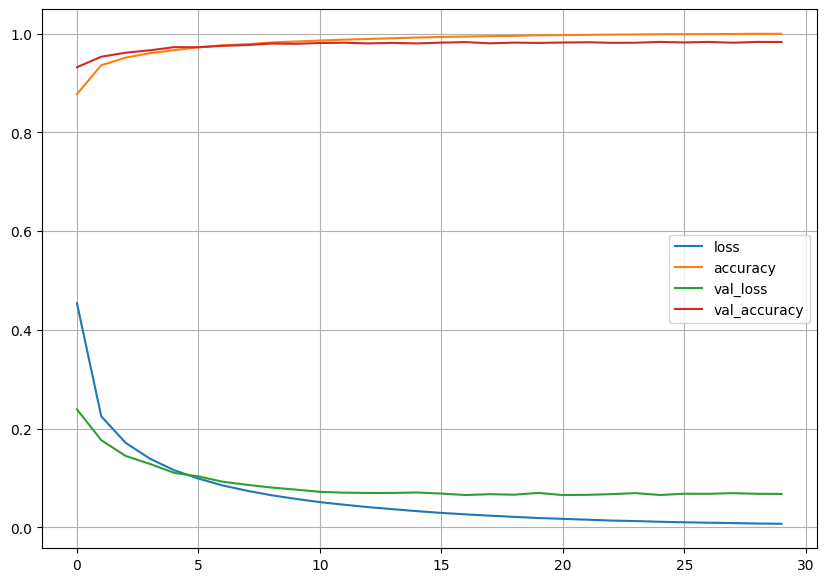

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9807


[0.06703604757785797, 0.9807000160217285]

# Save, serialize, and export models with Tensorflow(Keras)

## Introduction

A Keras model consists of multiple components:

- The architecture, or configuration, which specifies what layers the model
contain, and how they're connected.
- A set of weights values (the "state of the model").
- An optimizer (defined by compiling the model).
- A set of losses and metrics (defined by compiling the model).

The Keras API saves all of these pieces together in a unified format,
marked by the `.keras` extension. This is a zip archive consisting of the
following:

- A JSON-based configuration file (config.json): Records of model, layer, and
other trackables' configuration.
- A H5-based state file, such as `model.weights.h5` (for the whole model),
with directory keys for layers and their weights.
- A metadata file in JSON, storing things such as the current Keras version.

Let's take a look at how this works.

## How to save and load a model

If you only have 10 seconds to read this guide, here's what you need to know.

**Saving a Keras model:**

```python
model = ...  # Get model (Sequential, Functional Model, or Model subclass)
model.save('path/to/location.keras')  # The file needs to end with the .keras extension
```

**Loading the model back:**

```python
model = keras.models.load_model('path/to/location.keras')
```

Now, let's look at the details.

## Saving

This section is about saving an entire model to a single file. The file will include:

- The model's architecture/config
- The model's weight values (which were learned during training)
- The model's compilation information (if `compile()` was called)
- The optimizer and its state, if any (this enables you to restart training
where you left)

#### APIs

You can save a model with `model.save()` or `keras.models.save_model()` (which is equivalent).
You can load it back with `keras.models.load_model()`.

The only supported format in Keras 3 is the "Keras v3" format,
which uses the `.keras` extension.

**Example:**

In [ ]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model_clf.save("mnist.keras")

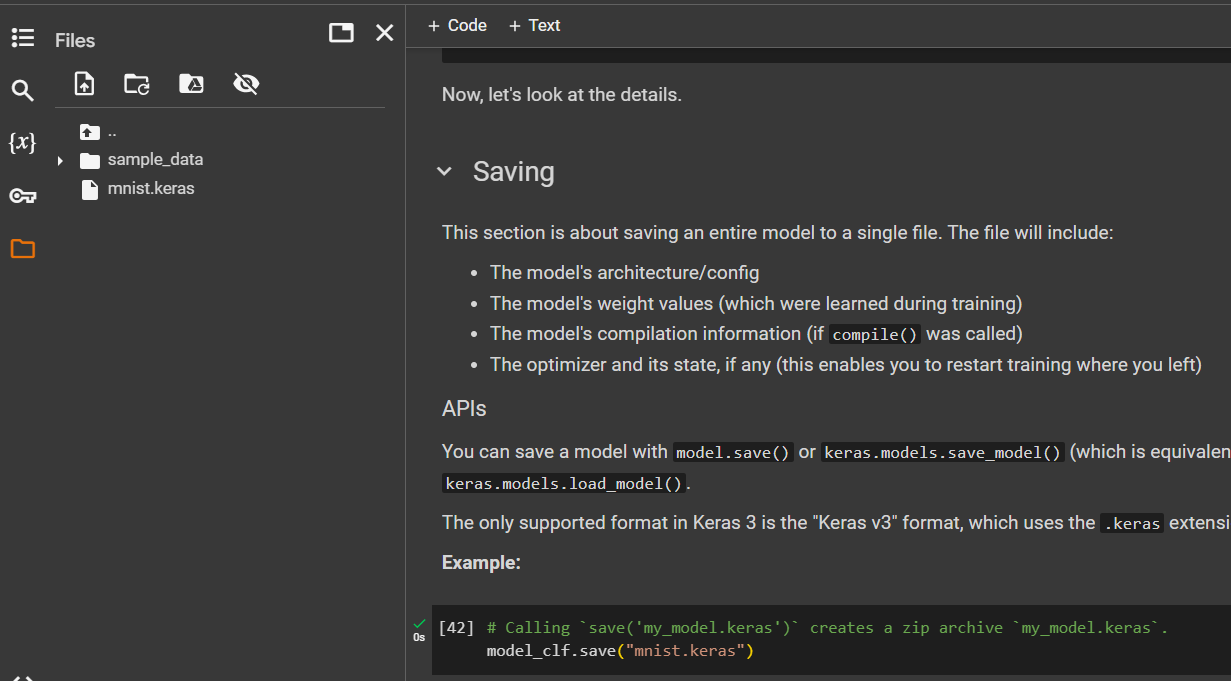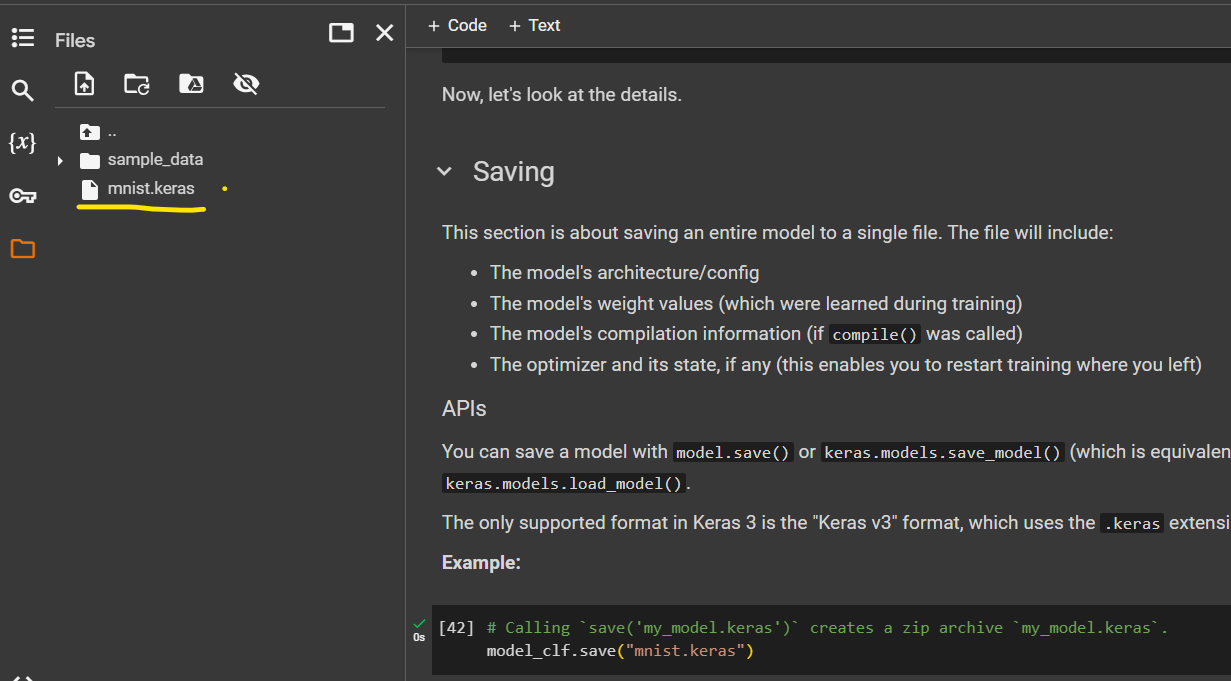

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("/content/mnist.keras")
X_new = X_test[:3]



# Let's check:
np.testing.assert_allclose(
    model_clf.predict(X_new), reconstructed_model.predict(X_new)
)

1/1 [==============================] - 0s 49ms/step


In [ ]:
y_prob = model_clf.predict(X_new)

y_prob.round(3)

1/1 [==============================] - 0s 97ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

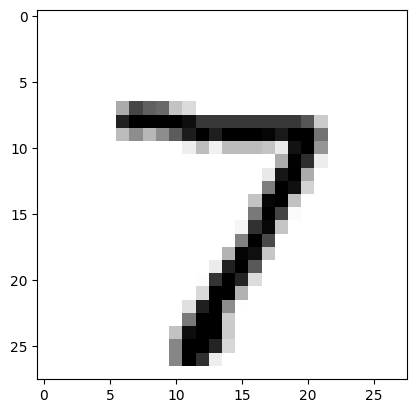

In [ ]:
plt.imshow(X_new[0], cmap="binary")

In [ ]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

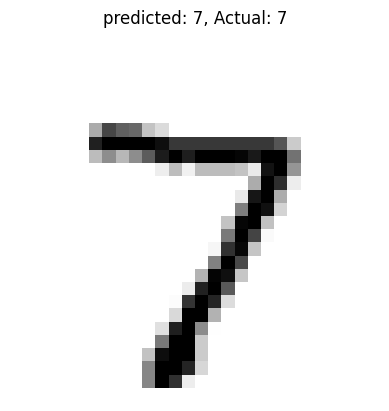

------------------------------------------------------------


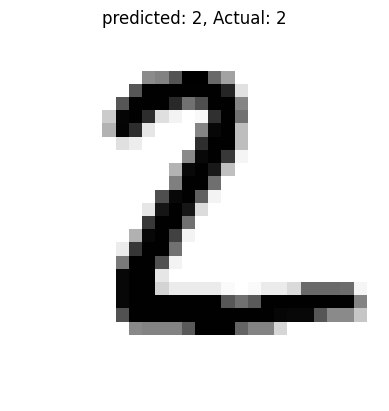

------------------------------------------------------------


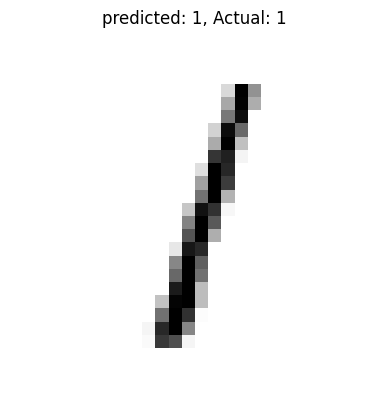

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)